In [1]:
from glob import glob
import matplotlib.pyplot as plt
import os
import os.path
import configparser 
import requests
import pandas as pd
from datetime import datetime

import numpy as np
from pathlib import Path

In [2]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')
print(list(config.keys()))
config

['DEFAULT', 'Verzeichnisse', 'Links', 'Einstellungen']


In [19]:
ScratchPfad = Path(config['Verzeichnisse']['Verarbeitungspfad'])
Text_Pfad = ScratchPfad/'Text'

In [20]:
list(config['Verzeichnisse'].keys())
df = pd.read_csv(config['Verzeichnisse']['inputcsv'],sep=';')
df['Sitzungsdatum']=df[['Sitzungsdatum']].astype('datetime64[ns]')
#df['Legislatur']=df[['Legislatur']].astype('datetime64[ns]')
df['Dokumentendatum']=df[['Dokumentendatum']].astype('datetime64[ns]')

df = df.set_index('Traktandum_GUID')#Geschaeft_GUID not unique

df.shape

(4117, 35)

In [21]:
df.head(2)

,nr,Sitzungs_ID,Link zur Sitzung,Legislatur,Jahr,Bezeichnung,Sitzungsdatum,Freigabe,Ort,Zeit,...,Aktenplan Ebene4,Aktenplan Ebene5,Aktenplan Ebene6,Dokumentendatum,Dokumententitel,Traktandentitel,Vorberatende Kommission,Traktandenstatus,Traktandennummer,Geschaeft_GUID
Traktandum_GUID,,,,,,,,,,,,,,,,,,,,,
93963f811e3647fd932335346f69a3aa,2015-05-19T00:00:00.000-1,b1efd5e4190e435f8c5d510bae7f9734,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2013 - 31.12.2016,2015,29. Sitzung Stadtparlament,2015-05-19,Öffentlich,NaN,16:00,...,Zonenpläne (inkl. Schutzgebiete),NaN,NaN,2015-05-26,Protokoll StParl 19.05.2015,Änderung von Bauordnung und Zonenplan für die ...,NaN,verschoben,1.0,06fb83df670049a8bc41a9885cf8bbe9
493483415bb249729122bf324c06d37b,2006-08-29T00:00:00.000-9,b34c57055ae345f48dc0a16c8ecbf587,NaN,01.01.2005 - 31.12.2008,2006,25. Sitzung Stadtparlament,2006-08-29,Öffentlich,Waaghaus,NaN,...,Stadtparlament: Parlamentarische Vorstösse,Stadtparlament: Interpellationen,NaN,2006-08-29,Protokoll StParl 29.08.2006,Interpellation Angela Tsering-Bruderer: Mitmac...,NaN,NaN,9.0,e86168b6dc4e4f0dbf591c8b0c475228


In [22]:
urls = df['Download Traktandumsdokumente'].dropna().map(lambda x: Path(x))
urls.shape,urls.nunique() #URLs sind mehrfach gelistet!!!

((4115,), 2721)

In [23]:
uni = urls.map(lambda p:p.name).map(lambda s: Path(s).with_suffix('')).unique()
filelist_ser = pd.Series(uni,index=uni).map(lambda G_GUID: list((Text_Pfad/G_GUID).glob('*.txt')) if not pd.isnull(G_GUID) else '')

In [24]:
filelist_ser

06fb83df670049a8bc41a9885cf8bbe9    [/home/toedtli/opendatasg/verarbeitung/Text/06...
e86168b6dc4e4f0dbf591c8b0c475228    [/home/toedtli/opendatasg/verarbeitung/Text/e8...
487ce77608604f0d83746135853f12cd    [/home/toedtli/opendatasg/verarbeitung/Text/48...
b519750806854dca8de5dd6b4e5830e7    [/home/toedtli/opendatasg/verarbeitung/Text/b5...
e0e0c6a0764e44269539e7b3e413bb8e    [/home/toedtli/opendatasg/verarbeitung/Text/e0...
                                                          ...                        
6065aa1704014fa6850f1f2dc1b88ca9                                                   []
c33ad73a4a994949a550fcd0553693a7                                                   []
0488ed5dcf734b6d9990c80ec94f39c7                                                   []
e8ef3c74388848c487a14d6ea4d843f2                                                   []
6273913fb694495c95389c9946a68385                                                   []
Length: 2721, dtype: object

In [25]:
list(config['Verzeichnisse'].keys())
ScratchPfad

PosixPath('/home/toedtli/opendatasg/verarbeitung')

In [26]:
Text_Pfad = ScratchPfad/'Text'
Text_Pfad_txt = Text_Pfad
#filelist = Text_Pfad_txt.glob('*/*.txt')
#filelist = glob(r'/home/beat/male-fs22/data/text/*/*.txt')
#filelist=list(filelist)
#len(filelist),filelist[:4],filelist[0].exists()

In [29]:
df.head()

,nr,Sitzungs_ID,Link zur Sitzung,Legislatur,Jahr,Bezeichnung,Sitzungsdatum,Freigabe,Ort,Zeit,...,Aktenplan Ebene4,Aktenplan Ebene5,Aktenplan Ebene6,Dokumentendatum,Dokumententitel,Traktandentitel,Vorberatende Kommission,Traktandenstatus,Traktandennummer,Geschaeft_GUID
Traktandum_GUID,,,,,,,,,,,,,,,,,,,,,
93963f811e3647fd932335346f69a3aa,2015-05-19T00:00:00.000-1,b1efd5e4190e435f8c5d510bae7f9734,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2013 - 31.12.2016,2015,29. Sitzung Stadtparlament,2015-05-19,Öffentlich,NaN,16:00,...,Zonenpläne (inkl. Schutzgebiete),NaN,NaN,2015-05-26,Protokoll StParl 19.05.2015,Änderung von Bauordnung und Zonenplan für die ...,NaN,verschoben,1.0,06fb83df670049a8bc41a9885cf8bbe9
493483415bb249729122bf324c06d37b,2006-08-29T00:00:00.000-9,b34c57055ae345f48dc0a16c8ecbf587,NaN,01.01.2005 - 31.12.2008,2006,25. Sitzung Stadtparlament,2006-08-29,Öffentlich,Waaghaus,NaN,...,Stadtparlament: Parlamentarische Vorstösse,Stadtparlament: Interpellationen,NaN,2006-08-29,Protokoll StParl 29.08.2006,Interpellation Angela Tsering-Bruderer: Mitmac...,NaN,NaN,9.0,e86168b6dc4e4f0dbf591c8b0c475228
1f218c4961144ff79051bd6ec2a86aeb,2006-08-29T00:00:00.000-3,b34c57055ae345f48dc0a16c8ecbf587,NaN,01.01.2005 - 31.12.2008,2006,25. Sitzung Stadtparlament,2006-08-29,Öffentlich,Waaghaus,NaN,...,Wasser: Hauszuleitungen,Wasser: Hauszuleitungen: Bauliches,NaN,2006-08-29,Protokoll StParl 29.08.2006,St.Gallen - Zürcher Strasse; Erneuerung der Wa...,NaN,NaN,3.0,487ce77608604f0d83746135853f12cd
1b7e8b9770eb4f6ba8f7cb84372145da,2006-08-29T00:00:00.000-13,b34c57055ae345f48dc0a16c8ecbf587,NaN,01.01.2005 - 31.12.2008,2006,25. Sitzung Stadtparlament,2006-08-29,Öffentlich,Waaghaus,NaN,...,Stadtparlament: Parlamentarische Vorstösse,Stadtparlament: Postulate,NaN,2006-08-29,Protokoll StParl 29.08.2006,Postulat Christian Hostettler: Das Nein zur Zü...,NaN,NaN,13.0,b519750806854dca8de5dd6b4e5830e7
ea3769d5b9604c60b3ccfc24ad23062d,2006-08-29T00:00:00.000-5,b34c57055ae345f48dc0a16c8ecbf587,NaN,01.01.2005 - 31.12.2008,2006,25. Sitzung Stadtparlament,2006-08-29,Öffentlich,Waaghaus,NaN,...,Elektrizität: Allgemeines,NaN,NaN,2006-08-29,Protokoll StParl 29.08.2006,Contracting Notstromanlage Stadion / Einkaufsz...,NaN,NaN,5.0,e0e0c6a0764e44269539e7b3e413bb8e


814247

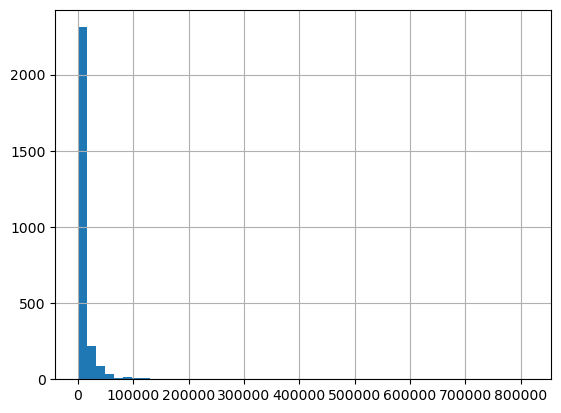

In [30]:
import codecs
def read_and_concat(filelist):
    text = ''
    for file in filelist:
        try:
            with codecs.open(file,'r',encoding='utf-8') as fh:
                lines = fh.readlines()
            text += ''.join(lines)
        except FileNotFoundError as err:
            print(file)
            continue
    return text
single_text_per_G_GUID = filelist_ser.map(read_and_concat)
single_text_per_G_GUID.map(len).hist(bins=50)
single_text_per_G_GUID.map(len).max()

In [31]:
#single_text_per_G_GUID = single_text_per_G_GUID[single_text_per_G_GUID.map(len)>0] Damit gingen Dokumente verloren!
single_text_per_G_GUID.name = 'Volltext'
single_text_per_G_GUID

06fb83df670049a8bc41a9885cf8bbe9     Nachtrag I zur Bauordnung vom 29. August 2000...
e86168b6dc4e4f0dbf591c8b0c475228     C Stadt St.Gallen Stadtrat Vorlage an das Sta...
487ce77608604f0d83746135853f12cd    C Stadt St.Gallen Stadtrat Vorlage an das Stad...
b519750806854dca8de5dd6b4e5830e7    C Stadt St.Gallen Stadtrat Beschluss vom 8. Au...
e0e0c6a0764e44269539e7b3e413bb8e    C Stadt St.Gallen Stadtrat Vorlage an das Stad...
                                                          ...                        
6065aa1704014fa6850f1f2dc1b88ca9                                                     
c33ad73a4a994949a550fcd0553693a7                                                     
0488ed5dcf734b6d9990c80ec94f39c7                                                     
e8ef3c74388848c487a14d6ea4d843f2                                                     
6273913fb694495c95389c9946a68385                                                     
Name: Volltext, Length: 2721, dtype: object

In [32]:
df.index.nunique(),single_text_per_G_GUID.index.nunique()

(4115, 2721)

In [33]:
dfjoined = df.join(single_text_per_G_GUID)
dfjoined = dfjoined[~dfjoined.index.isnull()]
print(dfjoined.shape)
dfjoined.head(5)

(4115, 36)


,nr,Sitzungs_ID,Link zur Sitzung,Legislatur,Jahr,Bezeichnung,Sitzungsdatum,Freigabe,Ort,Zeit,...,Aktenplan Ebene5,Aktenplan Ebene6,Dokumentendatum,Dokumententitel,Traktandentitel,Vorberatende Kommission,Traktandenstatus,Traktandennummer,Geschaeft_GUID,Volltext
Traktandum_GUID,,,,,,,,,,,,,,,,,,,,,
00050e367e7c453c92fb4949cfc9037f,2021-03-23T00:00:00.000-14,fed40e1386c741e881087c113a6eefbc,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2021 - 31.12.2024,2021,3. Sitzung Stadtparlament,2021-03-23,Öffentlich,Olma Messen; Halle 2.1,16:00,...,Stadtparlament: Interpellationen,NaN,2021-03-08,Beschlussprotokoll Stadtparlament mit Abstimmu...,Interpellation SVP-Fraktion: Parkiergebühren i...,NaN,behandelt,14.0,d4573d7581c5426aaf60f873d156f73a,NaN
0007982768c146649ea3a6e30c1e870c,2013-12-10T00:00:00.000-8,06344ecdbafa476692c3596d4d4e3380,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2013 - 31.12.2016,2013,11. Sitzung Stadtparlament,2013-12-10,Öffentlich,Waaghaus,16:00,...,Stadtparlament: Einfache Anfragen,NaN,2013-12-16,Protokoll Stadtparlament vom 10. Dezember 2013,Einfache Anfrage Monika Simmler: Veränderte Pr...,NaN,behandelt,8.0,8f5cd002e733455e9916ee954df5bf1c,NaN
0032e211a7ba47ba8125a3593e40439f,2019-06-25T00:00:00.000-6,70e151b0e4814773b7de9fc3f00a468d,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2017 - 31.12.2020,2019,34. Sitzung Stadtparlament Aufräumsitzung,2019-06-25,Öffentlich,Waaghaus,16:00,...,Stadtparlament: Interpellationen,NaN,2019-07-01,Beschlussprotokoll Stadtparlament 25.06.2019 i...,Interpellation Guido Berlinger-Bolt: «Scherrer...,NaN,behandelt,6.0,e21a1149fb1e41548a946161eed64713,NaN
00528b6059e54070b098b97139badfe9,2023-10-31T00:00:00.000-21,c26f59a0c7c24896a7c95c52759b9f64,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2021 - 31.12.2024,2023,34. Sitzung Stadtparlament,2023-10-31,Öffentlich,Waaghaus,16:00,...,Stadtparlament: Einfache Anfragen,NaN,2023-11-02,Beschlussprotokoll Stadtparlament mit Abstimmu...,Einfache Anfrage Doris Königer: Das unendliche...,NaN,behandelt,21.0,20fbd38b188a4c84a4e71c99c195bc61,NaN
0062fff42204448b9c4d5047ccf1c942,2002-05-21T00:00:00.000-3,94d5f19a624a4ea38df94ba0b54815e3,NaN,01.01.2001 - 31.12.2004,2002,21. Sitzung Stadtparlament,2002-05-21,Öffentlich,Waaghaus,NaN,...,Sportanlagen Neudorf: Bauliches,NaN,2002-05-21,Protokoll StParl 21.05.2002,Projektierungskredit für das Polysportive Zent...,NaN,behandelt,3.0,809e39a951d54f74ab2660a8aa04d95c,NaN


In [34]:
import importlib  
import sys
sys.path.append('..')
stadtsg = importlib.import_module("data-stadt-sg")
stadtsg.get_traktandierte_geschaefte
get_traktandierte_geschaefte = getattr(stadtsg, 'get_traktandierte_geschaefte')

In [44]:
get_traktandierte_geschaefte('../config.ini')

NameError: name 'get_traktandierte_geschaefte' is not defined

In [61]:
import codecs
import pandas as pd
import numpy as np
def load_documents_to_df(filelist):
    #data = {}
    IDcountDict = defaultdict(lambda :0)
    AllDocsDict = defaultdict(lambda :'')
    for file in filelist:
        Geschaefts_ID = os.path.basename(os.path.split(file)[0])
        IDcountDict[Geschaefts_ID]+=1
        try:
            with codecs.open(file,'r',encoding='utf-8') as fh:
                lines = fh.readlines()
            text = ''.join(lines)
            #data[file]=text
            AllDocsDict[Geschaefts_ID]+=text
        except FileNotFoundError as err:
            continue    
    #data_dict = {os.path.basename(k):v for k,v in data.items()}
    index = np.arange(len(AllDocsDict))
    AllDocsser = pd.Series(AllDocsDict)
    return AllDocsser,pd.Series(IDcountDict)

In [62]:
AllDocsser,NrDocumentsPerGeschaeft= load_documents_to_df(filelist)
AllDocsser.head()

0013105d702a4ea7b4609cab653701d9     C Stadt St.Gallen Stadtrat Vorlage Stadtparla...
0030fbaf6f1244428752ec79f0ea707f    C Stadt St.Gallen Stadtrat Vorlage an den Gros...
003357f86def402fa435e330c8c72aca     Stadt St.Gallen Stadtrat Vorlage Stadtparlame...
0042fedddd4447eb9b90c6eb21f88e6c    (cid:1) Stadt St.Gallen Fraktionen Vorlage Sta...
00562d0127a144df91d667ccefa12911     Stadt St.Gallen Stadtrat Vorlage Stadtparlame...
dtype: object

<AxesSubplot:>

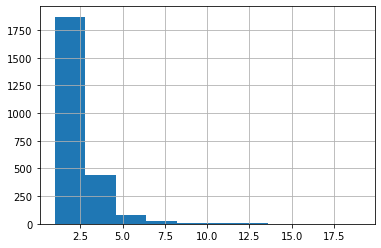

In [63]:
NrDocumentsPerGeschaeft.hist()

In [35]:
dftrain = pd.read_csv('../data/Open-Data-SG/train.csv',index_col='Id')
dftrain.head()

,X1,y
Id,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5
1,Erweiterung der Freihandbibliothek an der Kath...,3
2,Wahl einer nichtständigen Kommission zur Vorbe...,10
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10
4,Schutzverordnung Goldachtobel,12


In [38]:
df = pd.read_csv(download_filename,sep=';')
df.head()

,nr,Sitzungs_ID,Link zur Sitzung,Legislatur,Jahr,Bezeichnung,Sitzungsdatum,Freigabe,Ort,Zeit,...,Aktenplan Ebene5,Aktenplan Ebene6,Dokumentendatum,Dokumententitel,Traktandentitel,Vorberatende Kommission,Traktandenstatus,Traktandennummer,Geschaeft_GUID,Traktandum_GUID
0,2014-05-06T00:00:00.000-2,00731bb5b58e4aa0a731370c10e23550,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2013 - 31.12.2016,2014,16. Sitzung Stadtparlament,2014-05-06,Öffentlich,Waaghaus,16:00,...,NaN,NaN,2014-05-13,Protokoll Stadtparlament 6. Mai 2014,Neubau des Doppelkindergartens Oberzilstrasse 11,DBP,behandelt,2.0,00e39bd219f34918a9cbc202682fd945,b79087c371a84e198ef60fd4865e3325
1,2006-11-28T00:00:00.000-6,02fa0fc0d010458db69ae0b3bfa0fc23,NaN,01.01.2005 - 31.12.2008,2006,30. Sitzung Stadtparlament,2006-11-28,Öffentlich,Waaghaus,NaN,...,Stadtparlament: Interpellationen,NaN,2006-11-28,Protokoll StParl 28.11.2006,Interpellation Thomas Schwager: Massnahmenplan...,NaN,behandelt,6.0,e233e6d6c9124f0e920f226db79f3124,e7a2cc47dc6c4a28a37408430fbb3861
2,2006-11-28T00:00:00.000-2,02fa0fc0d010458db69ae0b3bfa0fc23,NaN,01.01.2005 - 31.12.2008,2006,30. Sitzung Stadtparlament,2006-11-28,Öffentlich,Waaghaus,NaN,...,NaN,NaN,2006-11-28,Protokoll StParl 28.11.2006,Energieversorgung Stadion / Einkaufszentrum We...,NaN,behandelt,2.0,636e379219164de0b5c766aad9e07936,0e42ce9327ac47ecadb2d6f0e09ddb72
3,2017-10-24T00:00:00.000-12,03d66ee79146403394935bb0b5957fe6,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2017 - 31.12.2020,2017,11. Sitzung Stadtparlament Aufräumsitzung,2017-10-24,Öffentlich,NaN,16:00,...,Stadtparlament: Interpellationen,NaN,2017-10-30,Beschlussprotokoll Stadtparlament 24.10.2017 i...,Interpellation Jennifer Deuel und Karl Schimke...,DBF,behandelt,12.0,cd288811f98e428d92a9b622f481303c,d354a67336c847b1a78a86e375f07b12
4,2017-10-24T00:00:00.000-4,03d66ee79146403394935bb0b5957fe6,https://www.stadt.sg.ch/home/verwaltung-politi...,01.01.2017 - 31.12.2020,2017,11. Sitzung Stadtparlament Aufräumsitzung,2017-10-24,Öffentlich,NaN,16:00,...,NaN,NaN,2017-10-30,Beschlussprotokoll Stadtparlament 24.10.2017 i...,"Fuss- und Veloverkehr, Sofortmassnahmen (2018 ...",LBK,behandelt,4.0,ac6bcd93e9a94bdd9e6e49562bbf0a6f,67ebed60a3534c04b760be80c71f53b9


Die ID in AllDocsser ist die `Geschaeft_GUID`:

In [39]:
df.Sitzungs_ID.map(lambda s: 'c3070ef262404e1e8069112dd2d15d1b' in s).any()

False

In [40]:
df.Geschaeft_GUID.dropna().map(lambda s: 'c3070ef262404e1e8069112dd2d15d1b' in s).any()

True

In [41]:
dftrain.X1.iloc[0]

'Sanierung von zwei Kindergärten und zwei Doppelkindergärten; Rahmenkredit'

In [42]:
def find_titel(df,titel):
    LA = df.Traktandentitel.dropna().map(lambda s: titel in s)
    return LA[LA].index

In [43]:
titel = dftrain.X1.iloc[0]
def Finde_DokumentInfo(df,titel,verbose=False):
    indices = find_titel(df,titel)
    if verbose and indices.size>0:
        print(f'Der Titel\n<<<<{titel}>>>\nfindet sich in diesen Dokumenten: {indices.tolist()}')
    return indices
indices = Finde_DokumentInfo(df,dftrain.X1.iloc[11],verbose=True)

Der Titel
<<<<Überbauungsplan und Zonenplanänderung "Fisba Optik">>>
findet sich in diesen Dokumenten: [550]


In [44]:
df.loc[indices].Geschaeft_GUID

550    4a27f52eb0f34190b3d1701d3afd1dc8
Name: Geschaeft_GUID, dtype: object

In [45]:
#Kann natürlich auch passieren:
indices = Finde_DokumentInfo(df,'gibtsnicht')
indices

Int64Index([], dtype='int64')

In [46]:
neue_spalte = []
for irow,row in dftrain.iterrows():
    indices = Finde_DokumentInfo(df,row.X1)
    GUIDs = df.loc[indices].Geschaeft_GUID.unique().tolist()
    neue_spalte.append(GUIDs)

In [47]:
GUIDs

['27f6ffb80dfc412c8014cc4b72b65d19']

In [48]:
neue_spalte = pd.Series(neue_spalte,index=dftrain.index,name='GUIDs')

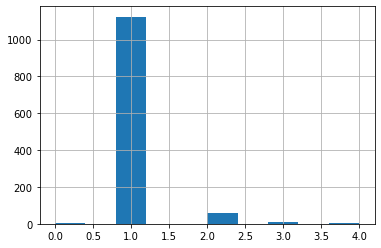

In [49]:
neue_spalte.map(len).hist();

Weil es offensichtlich Geschäfte mit mehreren Dokumenten gibt, können wir die GUIDs nicht als einzelnen String ablegen. 

In [50]:
dftrain['GUIDs']=neue_spalte
dftrain.head()

,X1,y,GUIDs
Id,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858]
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565]
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642]
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032]
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d]


In [64]:
import codecs
def holeTextDateien(GUIDListe):
    Textdateien = set()
    for GUID in GUIDListe:
        filelist = glob(f'{Text_Pfad}{GUID}\*.txt')
        Textdateien|=set(filelist) #Elemente einer Menge hinzufügen
    return Textdateien
def holeText(GUIDListe):
    Textdateien = holeTextDateien(GUIDListe)
    textlist = []
    for Textdatei in Textdateien:
        try:
            with codecs.open(Textdatei,'r',encoding='utf-8') as fh:
                lines = fh.readlines()
            textlist.append(' '.join(lines))
        except FileNotFoundError as err:
            continue
    return textlist

In [ ]:
#Beispiel zu obiger Mengensyntax:
x={1,2}
x|={3}
x

{1, 2, 3}

In [ ]:
dftrain.GUIDs.iloc[0]

['5c5d97cb5d504af49081116941868858']

In [67]:
import codecs
with codecs.open(glob(f'C:\Temp\Stadt_SG\extracts\{GUID}\*.txt')[0],encoding='utf-8') as fh:
    lines = fh.readlines()
lines

NameError: name 'GUID' is not defined

In [68]:
GUID=dftrain.GUIDs.iloc[0][0]
print(GUID)
glob(f'C:\Temp\Stadt_SG\extracts\{GUID}\*.txt')

5c5d97cb5d504af49081116941868858


['C:\\Temp\\Stadt_SG\\extracts\\5c5d97cb5d504af49081116941868858\\Beilage Rahmenkredit Kindergärten 2. Paket 24.08.2020 #1.txt',
 'C:\\Temp\\Stadt_SG\\extracts\\5c5d97cb5d504af49081116941868858\\Sanierung von zwei Kindergärten und zwei Doppelkindergärten; Rahmenkredit 25.06.2020 #0.txt']

In [43]:
holeText(dftrain.GUIDs.iloc[0])

[" Vorlage Stadtparlament Datum 1. September 2020 Beschluss Nr. 4565 Aktenplan 211.15 Kindergärten Sanierung von zwei Kindergärten und zwei Doppelkindergärten; Rahmenkredit Antrag Wir beantragen Ihnen, folgenden Beschluss zu fassen: 1. Der Sanierung von vier Kindergärten (Isenringweg 7, Achslenweg 10, Dreilindenhang 30, Wald- gutstrasse 6a) wird zugestimmt und dafür ein Rahmenkredit von CHF 2'400'000 erteilt. 2. Es wird festgestellt, dass dieser Beschluss nach Art.8 Ziff. 6 lit. a der Gemeindeordnung dem fakulta- tiven Referendum untersteht. 1 Ausgangslage Im Jahre 2013 haben das Schulamt (heute Dienststelle Schule und Musik) und das Hochbauamt den betrieblichen und baulichen Zustand aller städtischen Kindergärten untersucht und beurteilt. Die bauli- che Analyse ergab, dass sich acht Kindergärten in einem baulich schlechten Zustand befinden. Am 23. Februar 2017 legte der Stadtrat dem Stadtparlament eine Vorlage für einen Rahmenkredit im Umfang von CHF 5,1 Mio. für die Sanierung dieser 

In [44]:
dftrain.GUIDs.map(holeTextDateien)

Id
0       {C:\Temp\Stadt_SG\extracts\5c5d97cb5d504af4908...
1       {C:\Temp\Stadt_SG\extracts\26df226758334cb5bd3...
2       {C:\Temp\Stadt_SG\extracts\81554756428a40b69f0...
3       {C:\Temp\Stadt_SG\extracts\7fbf9d1b99f94cf0bc1...
4       {C:\Temp\Stadt_SG\extracts\a7cf239d72ff4cf6bc5...
                              ...                        
1199    {C:\Temp\Stadt_SG\extracts\a8a79292ea104f83aec...
1200    {C:\Temp\Stadt_SG\extracts\ccec1b64359648589f0...
1201    {C:\Temp\Stadt_SG\extracts\d3d7f910e84c4789bfe...
1202    {C:\Temp\Stadt_SG\extracts\3f8bd5b55359488799f...
1203    {C:\Temp\Stadt_SG\extracts\27f6ffb80dfc412c801...
Name: GUIDs, Length: 1204, dtype: object

Text(0.5, 1.0, 'Ich habe nicht alle Dokumente heruntergeladen!')

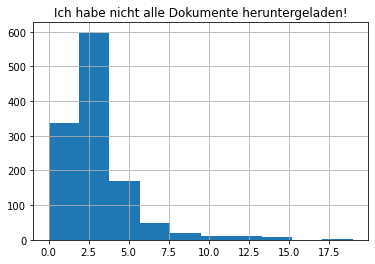

In [45]:
dftrain.GUIDs.map(holeText).map(len).hist()
plt.title('Ich habe nicht alle Dokumente heruntergeladen!')

In [46]:
heruntergeladene = dftrain[dftrain.GUIDs.map(holeText).map(len)>0]
heruntergeladene.head()

,X1,y,GUIDs
Id,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858]
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565]
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642]
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032]
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d]


In [47]:
dftrain['Text']=heruntergeladene.GUIDs.map(holeText).map(lambda l:''.join(l))

In [48]:
dftrain.head() #Ich habe nicht alle Dokumente heruntergeladen- daher ev. in der Textspalte hier nur NaNs sichtbar

,X1,y,GUIDs,Text
Id,,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858],Vorlage Stadtparlament Datum 1. September 202...
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565],C Stadt St.Gallen Stadtrat Vorlage an das Stad...
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642],GGR-Vorlage Ausgliederung sgsw Beilage 5 Model...
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032],St.Georgen-Strass 9 Untere Mühlentreppe Münhel...
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d],Schutzverordnung Goldachtobel August 2019 Ges...


Zeige nur die erfolgreich annotierten GUIDs an:

In [49]:
dfnotnull = dftrain[~ dftrain.Text.isnull()]
dfnotnull.head()

,X1,y,GUIDs,Text
Id,,,,
0,Sanierung von zwei Kindergärten und zwei Doppe...,5,[5c5d97cb5d504af49081116941868858],Vorlage Stadtparlament Datum 1. September 202...
1,Erweiterung der Freihandbibliothek an der Kath...,3,[26df226758334cb5bd353a3ddd6fb565],C Stadt St.Gallen Stadtrat Vorlage an das Stad...
2,Wahl einer nichtständigen Kommission zur Vorbe...,10,[81554756428a40b69f08b73849e97642],GGR-Vorlage Ausgliederung sgsw Beilage 5 Model...
3,St.Gallen – Felsenstrasse; Kappellenstrasse bi...,10,[7fbf9d1b99f94cf0bc1f2a72778b2032],St.Georgen-Strass 9 Untere Mühlentreppe Münhel...
4,Schutzverordnung Goldachtobel,12,[a7cf239d72ff4cf6bc5853e54df8492d],Schutzverordnung Goldachtobel August 2019 Ges...


In [62]:
#dfnotnull.to_feather('data.feather')
dfnotnull.to_csv('../data/Open-Data-SG/train_text.csv')

Wir sollten zumindest stichprobenhaft überprüfen, dass die Titel etwas mit den dazugenommenen Texten zu tun haben!

In [56]:
random_row = dfnotnull.sample(1)
random_row.X1.values[0],random_row.Text.values[0]

('VBSG-Linie 2, Verlängerung Hinterberg; Umwandlung des Versuchsbetriebs in einen regulären Betrieb',
 "VBSG-Linie 2/8 Situation 1:5000 1 Tiefbauamt 5 1 4, 1/ Ahorn e ni Li 10-Min-Takt Linie 7 Hechtacker Friedhof Bruggen 20-Min-Takt 8 e n i L i Moosweiher Bernhardswies 20-Min-Takt 2 e Lini Rosenbüchel Fürstenlandbrücke 8 Gröblistrasse e i n i Bhf. Haggen L 20-Min-Takt Walserstrasse Stocken Rickenweg Haselstrasse 2 Haggen e ni Li 20-Min-Takt Hinterbergstrasse Hinterberg Schlössli Legende: Linie 4 Linie 2: Hauptachse Linie 8: verkehrt nur in Hauptverkehrszeit neue Linienführung bestehende Haltestelle neue Haltestelle bestehende Haltestelle überdacht neue Haltestelle überdacht Haltestelle aufheben / versetzen 0 100 200 m 15. März 2010 / BbC Stadt St.Gallen VBSG-Linie 2 und 8; Verlängerung Hinterberg und Erschliessung Rosenbüchel Fahrplan Anpassung Erschliessung Rosenbüchel ab 12.12.2010 Linie 2: St. Gallen Bhf - Ahorn - Bhf. Haggen - Hinterberg Linie 8: St. Gallen Bhf - Ahorn - Rosenbüche